Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [2]:
# cell for imports. All imports must go here.
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
titanic_df = pd.read_csv('train.csv')
print("Info:")
print(titanic_df.info())
titanic_df.head()

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

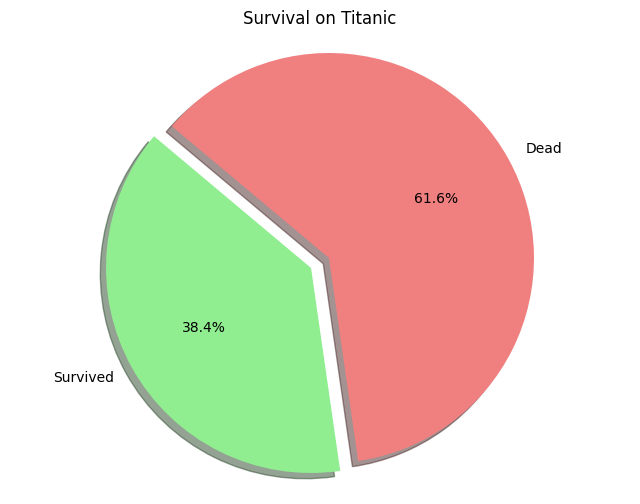

In [5]:
survived = titanic_df['Survived'].sum()
not_survived = len(titanic_df) - survived
labels = 'Survived', 'Dead'
sizes = [survived, not_survived]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Survival on Titanic')
plt.show()

Більше половини пасажирів Титаніка (61.6%) загинули, лише 38.4% пасажирів змогли вижити.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


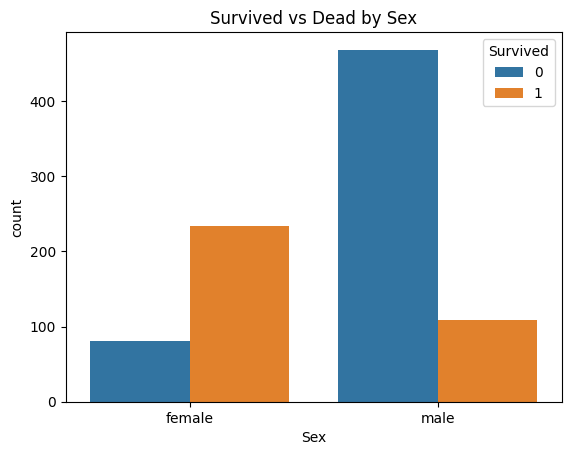

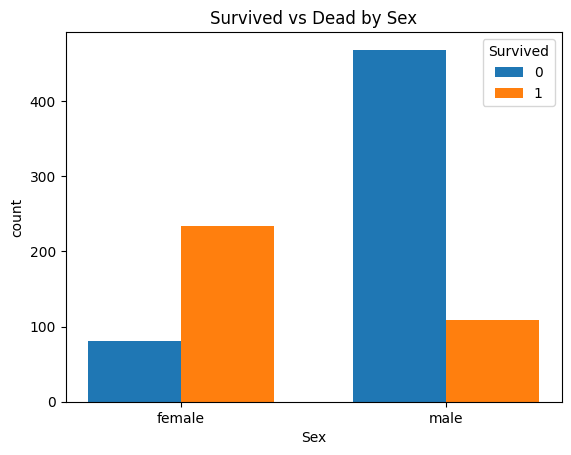

In [6]:
survival = titanic_df.groupby(['Sex', 'Survived'], as_index=False).count().fillna(0)
survival = survival.set_index(['Sex', 'Survived'])['PassengerId'].unstack().fillna(0)
index = np.arange(len(survival))
bar_width = 0.35
plt.bar(index, survival[0], label='0', width=bar_width)
plt.bar(index + bar_width, survival[1], label='1', width=bar_width)
plt.grid(False)
plt.xlabel('Sex')
plt.ylabel('count')
plt.title('Survived vs Dead by Sex')
plt.xticks(index + bar_width / 2, survival.index)
plt.legend(title='Survived')
plt.show()

Більшість пасажирів на кораблі були чоловіками, тож і серед загиблих було більше чоловіків, ніж жінок. Проте якщо порівнювати співвідношення загиблих за статтю, можна помітити, що серед жінок більшості вдалось врятуватись, натомість більшість чоловіків загинула, відносно тих, хто вижив. Попри те, що чоловіків більше, вдалось вижити більшій кількості жінок, ніж чоловіків. Також можна помітити, що загинуло менше жінок, ніж вижило чоловіків.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

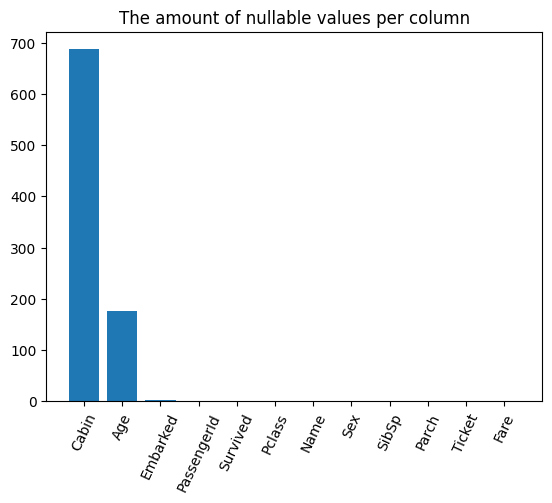

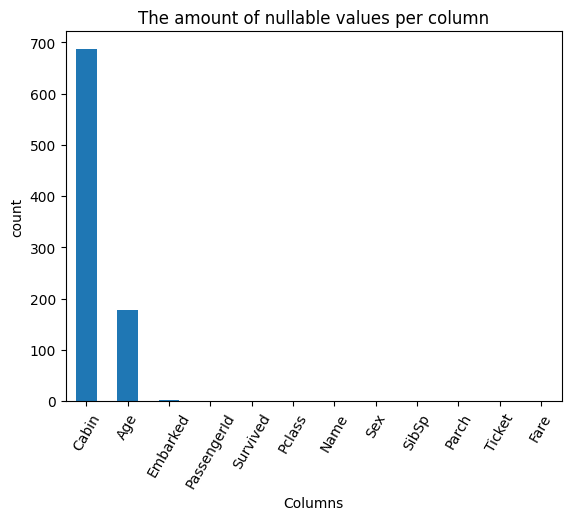

In [7]:
missing_values = titanic_df.isnull().sum().sort_values(ascending=False)
missing_values.plot.bar()
plt.xlabel('Columns')
plt.ylabel('count')
plt.title('The amount of nullable values per column')
plt.xticks(rotation=60)
plt.grid(False)
plt.show()

Колонка Embarked має кілька рядків із порожніми значеннями, колонка Age має близько 200 порожніх знвчень, проте це становить менше 30%, тож її можна лишити, хоча дозібрати ці дані було б гарною ідеєю. Більшість значень колонки Cabin є порожніми, тож варто було б її забрати. Решта колонок не мають порожніх значень.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

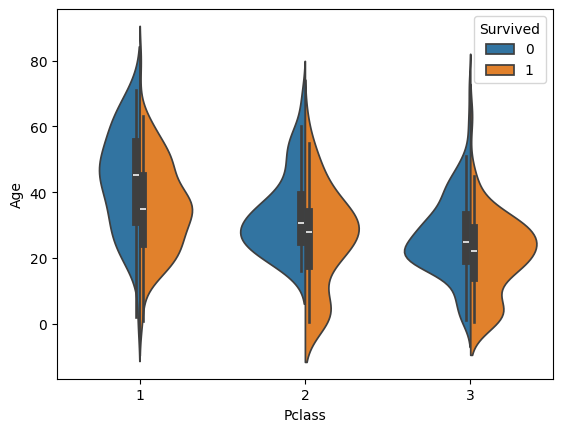

Text(0.5, 1.0, 'Age distribution per class for Survived and Dead')

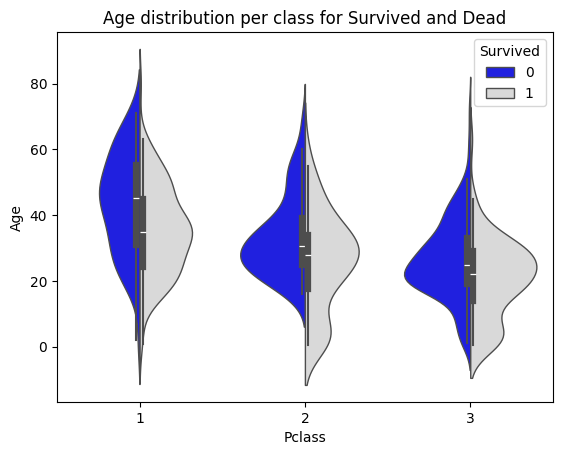

In [23]:
sns.violinplot(data=titanic_df, x="Pclass", y="Age", hue="Survived",
               split=True, inner="box", linewidth=1,
               palette={0: "b", 1: ".85"}).set_title("Age distribution per class for Survived and Dead")

Ця діаграма призначена для візуалізації розподілу віку пасажирів Титаніка в залежності від їх класу та виживання під час катастрофи. Вертикальна вісь діаграми показує вік пасажирів. За допомогою violinplot можна візуально зрозуміти розподіл віку серед пасажирів. Ширина кожної violinplot відображає густину розподілу віку: чим ширше violinplot, тим більше пасажирів з таким віком. Ми можемо побачити розподіл віку в залежності від класу з порівнянням розподілу віку серед виживших та загиблих в кожному класі.
Кожна violinplot має box у середині, який показує медіану, квартилі та межі варіації віку для виживших та загиблих пасажирів кожного класу.
Як можна побачити з візуалізації для пасажирів медіана віку загиблих близько 50 років, тоді як медіана віку виживших відрізняється і є нижчою - близько 40 років. В інших класах медіана віку загилих та виживших подібна - близько 30 років. Також можна помітити, що серед пасажирів 1 класу загинуло дещо більше літніх людей, в 1 класі мало дітей, тож малий відсоток виживших та загиблих дітей. В 2 та 3 класах значну частину виживших становлять діти, в 2 класі вдалось врятуватись всім діятм до 10 років, в третьому класі серед дітей є загиблі будь-якого віку. В 3 класі майже не представлені літні люди, віком більше 60, в 2 класі їх була невелика кількість.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


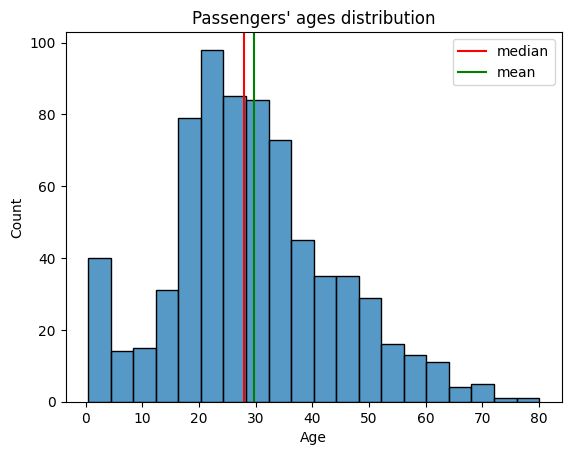

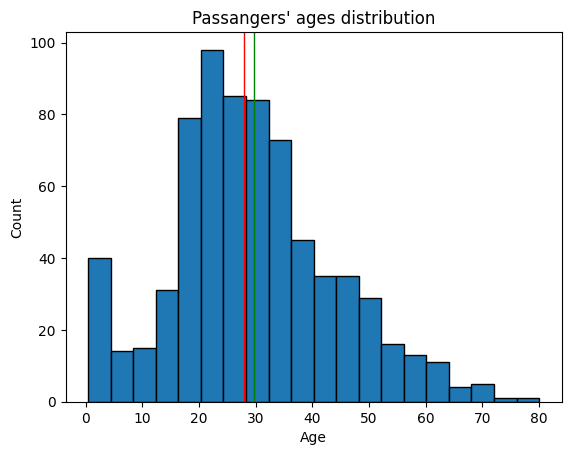

In [9]:
plt.hist(titanic_df['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Passangers\' ages distribution')
plt.grid(False)
plt.axvline(titanic_df['Age'].median(), color='red', linewidth=1, label='median')
plt.axvline(titanic_df['Age'].mean(), color='green', linewidth=1, label='mean')
plt.show()

Розподіл віку в цілому є нормальним розподілом, і розподіл віку в цьому датасеті наближається до нормального. Середній вік пасажирів на борту - 30 років, медіана - 28 років. Переважно на борту були молоді люди віком 20-40 років, деещо менше дітей та підлітків та ще менше літніх людей.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

З якого порту посадки вижило найбільше пасажирів? З якого порту посадки загинуло найбільше пасажирів?

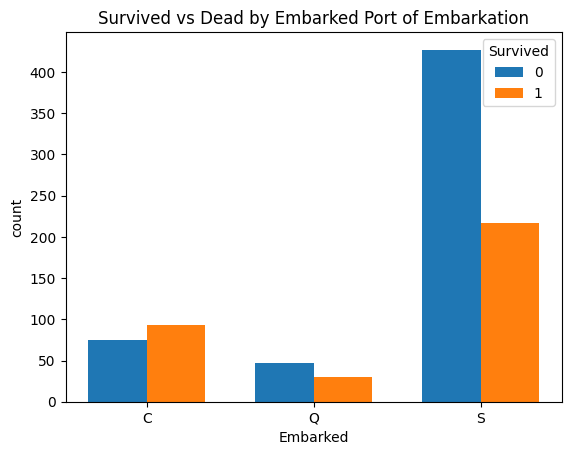

In [14]:
survival = titanic_df.groupby(['Embarked', 'Survived'], as_index=False).count().fillna(0)
survival = survival.set_index(['Embarked', 'Survived'])['PassengerId'].unstack().fillna(0)
index = np.arange(len(survival))
bar_width = 0.35
plt.bar(index, survival[0], label='0', width=bar_width)
plt.bar(index + bar_width, survival[1], label='1', width=bar_width)
plt.grid(False)
plt.xlabel('Embarked')
plt.ylabel('count')
plt.title('Survived vs Dead by Embarked Port of Embarkation')
plt.xticks(index + bar_width / 2, survival.index)
plt.legend(title='Survived')
plt.show()

Найбільше пасажирів сіло на борт в порту Southampton, з цього порту найбільше загиблих та найбільше виживших. У всіх портіх, окрім Cherbourg кількість врятованих майже вдвічі менше, ніж кількість загиблих. У Cherbourg кількість вижилих трохи більша ніж померлих.

Як клас пасажира впливає на кількість врятованих? Пасажирів якого класу врятувалось найбільше?

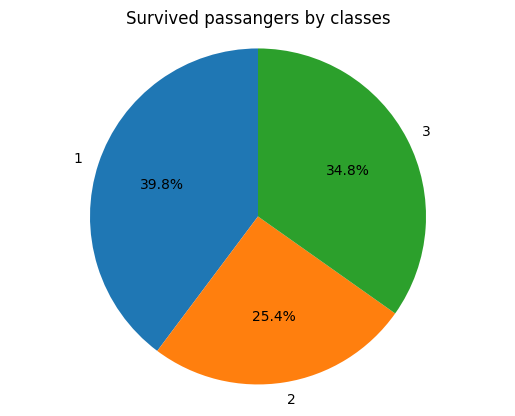

In [21]:
survival_by_class = titanic_df.groupby(['Pclass', 'Survived']).size().unstack()
survived_counts = survival_by_class[1]
plt.pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Survived passangers by classes')
plt.axis('equal')
plt.show()

Вцілому кількість врятованих з кожного класу є близькою між собою, проте найбільше людей врятувалось з 1 класу, а найменше з 2.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

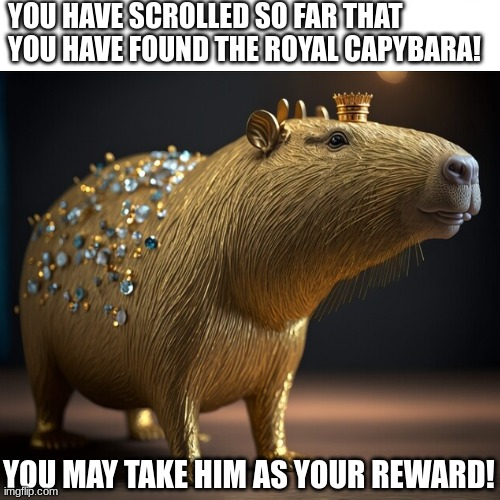